<a href="https://colab.research.google.com/github/anshajk/ik-classes/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition

This notebook demonstrates how to use PyTorch to build and train a simple neural network for handwritten digit recognition using the MNIST dataset.

The MNIST dataset contains 28x28 grayscale images of handwritten digits. The task is to classify each image into one of the 10 classes (0-9).

<img src="https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png" alt="Example Image" style="width:300px;height:200px;">

### Necessary Imports

We will import the required libraries to handle data loading, transformations, model building, and training.


In [ ]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [ ]:
import os
from google.colab import drive

### Download The Dataset & Define The Transforms

The MNIST dataset is available in torchvision. We will download it and define the necessary transformations to convert the images to tensors and normalize them.


In [ ]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4585296.78it/s]


Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134813.91it/s]


Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1087359.68it/s]


Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9416969.24it/s]

Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw



### Exploring The Data

Let's visualize some sample images from the dataset to understand what the data looks like.


In [ ]:
type(trainloader)

torch.utils.data.dataloader.DataLoader

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


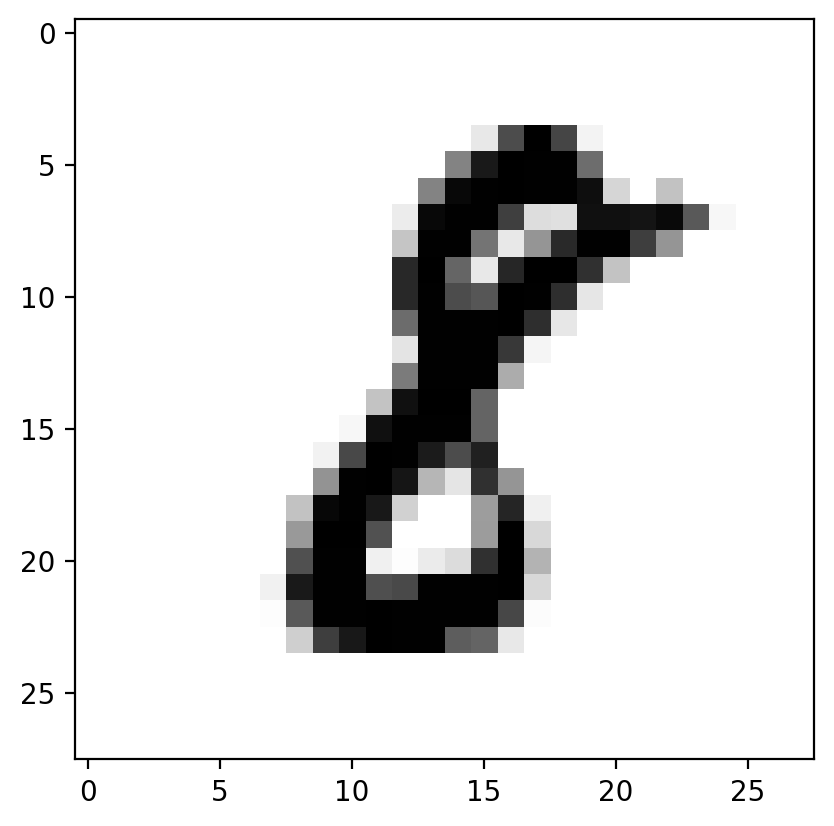

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

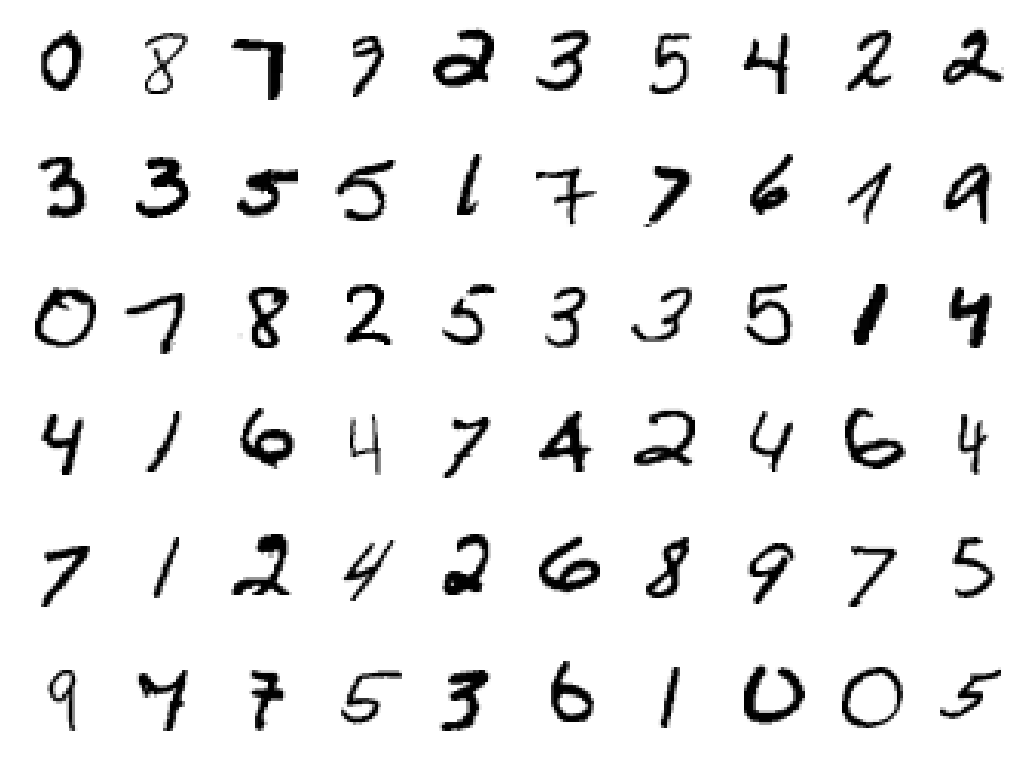

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [ ]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [ 0.0035,  0.0035,  0.0035,  ...,  0.0035,  0.0035,  0.0035],
        [ 0.0034,  0.0034,  0.0034,  ...,  0.0034,  0.0034,  0.0034],
        ...,
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005]])


In [ ]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-3.4988e-02,  1.5612e-02, -1.8064e-02,  ...,  3.0024e-02,
         -1.8276e-02, -3.0813e-03],
        [ 2.0524e-02,  7.6286e-03,  1.6531e-02,  ..., -2.9397e-02,
         -3.5383e-02, -6.2007e-03],
        [ 5.0899e-03,  2.1615e-02, -7.2012e-03,  ..., -6.9539e-04,
          1.0709e-02,  8.6325e-05],
        ...,
        [ 2.3469e-02, -5.9522e-03, -1.0458e-02,  ...,  2.8312e-02,
          2.1803e-02,  1.9187e-02],
        [-1.4193e-02,  4.5833e-04,  4.9039e-03,  ..., -1.1855e-02,
          9.7954e-03,  1.6964e-02],
        [ 2.1577e-02,  1.8480e-03, -2.3190e-02,  ..., -1.8868e-02,
          2.0275e-02, -2.5113e-02]], requires_grad=True)
Gradient - tensor([[-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [ 0.0032,  0.0032,  0.0032,  ...,  0.0032,  0.0032,  0.0032],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        ...,
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
   

In [ ]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-3.4973e-02,  1.5627e-02, -1.8049e-02,  ...,  3.0039e-02,
         -1.8261e-02, -3.0666e-03],
        [ 2.0492e-02,  7.5964e-03,  1.6499e-02,  ..., -2.9429e-02,
         -3.5415e-02, -6.2329e-03],
        [ 5.0846e-03,  2.1610e-02, -7.2065e-03,  ..., -7.0070e-04,
          1.0704e-02,  8.1024e-05],
        ...,
        [ 2.3471e-02, -5.9505e-03, -1.0456e-02,  ...,  2.8314e-02,
          2.1805e-02,  1.9189e-02],
        [-1.4188e-02,  4.6364e-04,  4.9093e-03,  ..., -1.1850e-02,
          9.8007e-03,  1.6969e-02],
        [ 2.1586e-02,  1.8572e-03, -2.3180e-02,  ..., -1.8859e-02,
          2.0284e-02, -2.5104e-02]], requires_grad=True)


### Training Of Neural Network

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.6437857376852396
Epoch 1 - Training loss: 0.2760738301267629
Epoch 2 - Training loss: 0.21286454873044353
Epoch 3 - Training loss: 0.17007936315257538
Epoch 4 - Training loss: 0.1445075919740458
Epoch 5 - Training loss: 0.12259362350656852
Epoch 6 - Training loss: 0.1067220892693633
Epoch 7 - Training loss: 0.09696269339161005
Epoch 8 - Training loss: 0.08659791163425011
Epoch 9 - Training loss: 0.07755258345434358
Epoch 10 - Training loss: 0.07125415930500639
Epoch 11 - Training loss: 0.0652158380687626
Epoch 12 - Training loss: 0.05993172036869122
Epoch 13 - Training loss: 0.054489084548239454
Epoch 14 - Training loss: 0.04944192323518961

Training Time (in minutes) = 3.6507890780766803


In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 8


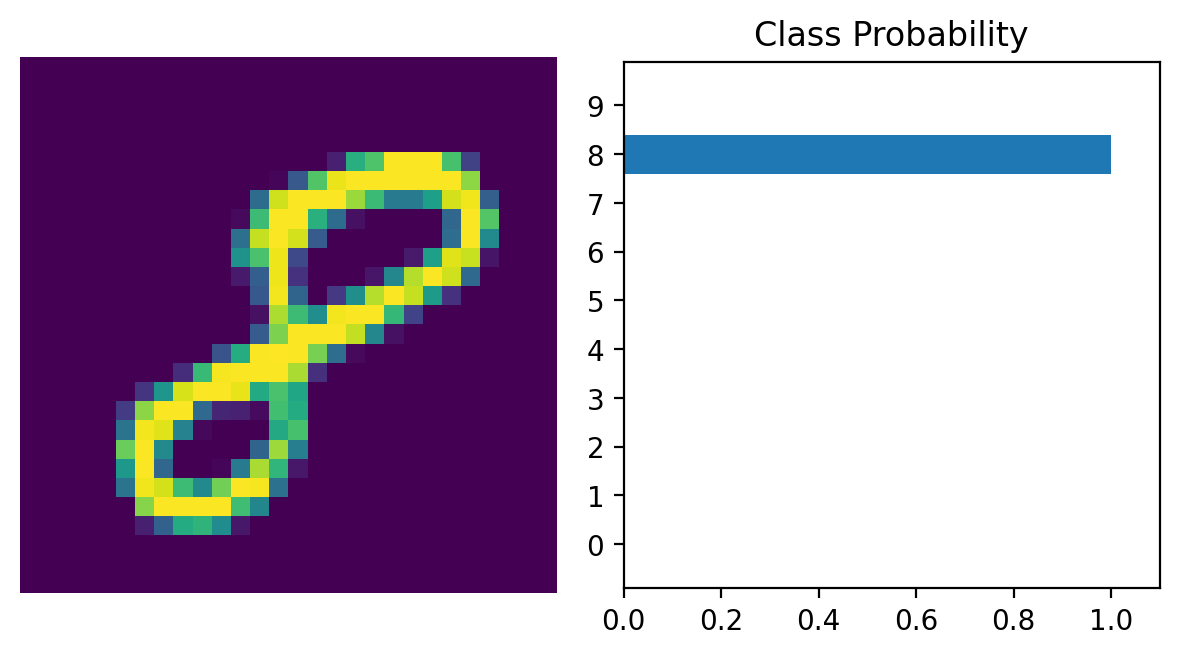

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

We will evaluate the model on the test dataset and visualize some predictions.


In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.975


### Conclusion

In this notebook, we successfully built and trained a simple neural network using PyTorch to recognize handwritten digits. This introduction to PyTorch provides the foundation for more complex models and deeper exploration.
